we have 700 scripts from 16 channels which focused on tech, politics, business and etc.

In [1]:
import pandas as pd
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
df=pd.read_csv(r'res.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
title           700 non-null object
url             700 non-null object
content         700 non-null object
views           700 non-null int64
posting_date    700 non-null object
dtypes: int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
df.isnull().sum()

title           0
url             0
content         0
views           0
posting_date    0
dtype: int64

In [5]:
data=df

In [14]:
contractions = {
    "\'s":"is",
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
}
text=' '.join(' '.join(df['content']).split())
for word in text:
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
tokens=text.split(' ')

In [ ]:
# uncontracted I'm to I am 
contractions = {
    "\'s":"is",
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",



}
text=' '.join(' '.join(df['title']).split())
for word in text:
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
tokens=text.split(' ')
tokens=df['content'].iloc[:300].apply(word_tokenize)
words=[j for i in tokens for j in i]
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(words))

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(letters_only)
len(tokens)
# stopwords=set(STOPWORDS)
# l=["[","]",'gon', 'na']
# stopwords = set(STOPWORDS)
# for i in l:
#     stopwords.add(i)
# # remove stopwords
# words= [word for word in words if word not in stopwords]

In [ ]:
len(tokens)

In [ ]:
tokens=tokens[:10000]

In [ ]:
import en
for word in words:
    if en.is_verb(word.lower()):
        text = text.replace(word, en.verb.present(word.lower()))
print text

In [ ]:
len(words)

In [ ]:
len(words)/len(tokens)

In [ ]:
length=[len(i) for i in tokens]
    

In [ ]:
new=pd.DataFrame(tokens)
new['l']=length

In [ ]:
new.index
import seaborn as sns

In [ ]:
data['#words']=length
data

In [ ]:
data['month']=pd.to_datetime(data['posting_date']).dt.month

In [ ]:
data['month'].unique()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data.index, data['#words'], hue=data['month'],sizes=10,palette='Set2')
plt.savefig('numbers of scripts.jpg')

### 1. Word cloud based on word frequency

In [ ]:
stopwords=set(STOPWORDS)
l=["'ve", "'re","'s","n't","[","]","'ll", 'I',"'m", 'gon', 'na']
stopwords = set(STOPWORDS)
for i in l:
    stopwords.add(i)

In [ ]:
words=[i for i in words if i not in stopwords]

In [ ]:
### choose adjectives
tags = set(['JJ', 'JJR', 'JJS']) #NN/NNS/VB/VBD/VBG
res=[]
for i in tokens:
    res.append(nltk.pos_tag(i))
flatten = lambda l: [item for sublist in l for item in sublist]
ret = []
for word,pos in flatten(res):
        if (pos in tags):
            ret.append(word)

In [ ]:
len(ret)

In [7]:
t=text

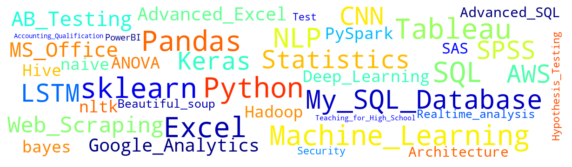

In [33]:
# Random Tweets
all_words = ' '.join([i for i in t])
wordcloud = WordCloud(collocations=False,background_color='white', colormap='jet', width=1200, height=330, random_state=11, max_font_size=60).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file('new.jpg')

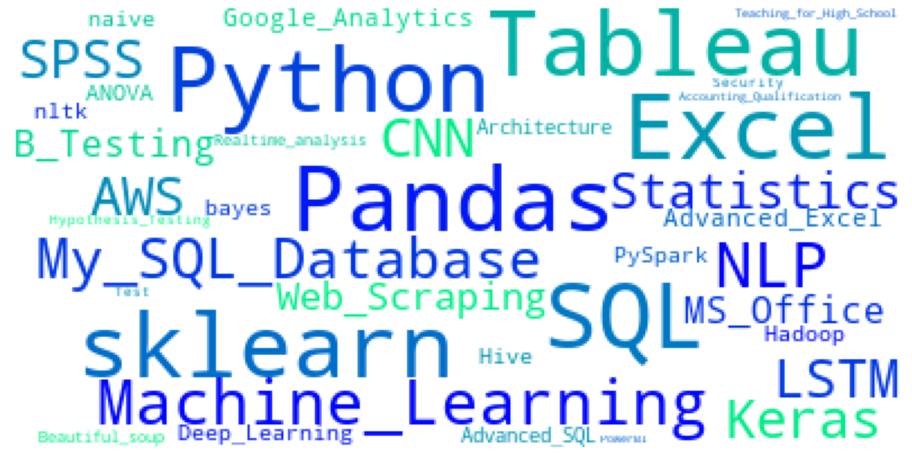

In [75]:
mpl.rcParams['figure.figsize']=(20.0,8.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=2000             
mpl.rcParams['figure.subplot.bottom']=.1 
# pos_mask = np.array(Image.open('unnamed.png'))
text = " ".join(i for i in t)
# print ("There are {} adjectives in the scripts.".format(len(ret)))

wordcloud = WordCloud(collocations=False,
                          background_color='white',
                          max_words=50,
                          max_font_size=40, 
                          random_state=1,
                          contour_width=1,
                          colormap="winter",
                          contour_color='black'
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('new.jpg')

In [34]:
import numpy as np
from PIL import Image

In [ ]:
pos_mask = np.array(Image.open('unnamed.png'))
text = " ".join(tweet for tweet in ret)
print ("There are {} adjectives in the scripts.".format(len(ret)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=60,
                          max_font_size=60, 
                          random_state=42,
                          mask = pos_mask,
                          contour_width=1,
                          colormap="winter",
                          contour_color='black'
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('adjective.png')

['My SQL Database',
 'My SQL Database',
 'My SQL Database',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'Pandas',
 'Pandas',
 'Pandas',
 'Pandas',
 'Pandas',
 'Pandas',
 'Pandas',
 'Pandas',
 'Pandas',
 'Pandas',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'sklearn',
 'R',
 'R',
 'R',
 'SAS Tableau',
 'Tableau',
 'Tableau',
 'Tableau',
 'Tableau',
 'Tableau',
 'Tableau',
 'Tableau',
 'Tableau',
 'Tableau',
 'SPSS MS Office',
 'MS Office',
 'MS Office',
 'MS Office',
 'MS Office',
 'MS Office',
 'MS Office',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Google Analytics',
 'Google Analytics',
 'Google Analytics',
 'PowerBI',
 'PowerBI',
 'PowerBI',
 'Teaching for High School',
 'Teaching for High School',
 'Teaching for Hig

In [ ]:
### choose adjectives
tags = set(['RB', 'RBR', 'RBS'])
res=[]
for i in tokens:
    res.append(nltk.pos_tag(i))
flatten = lambda l: [item for sublist in l for item in sublist]
ret = []
for word,pos in flatten(res):
        if (pos in tags):
            ret.append(word)

In [65]:
t=text

In [66]:
wordcloud = WordCloud(collocations=False).generate(" ".join(i for i in t))
wordcloud

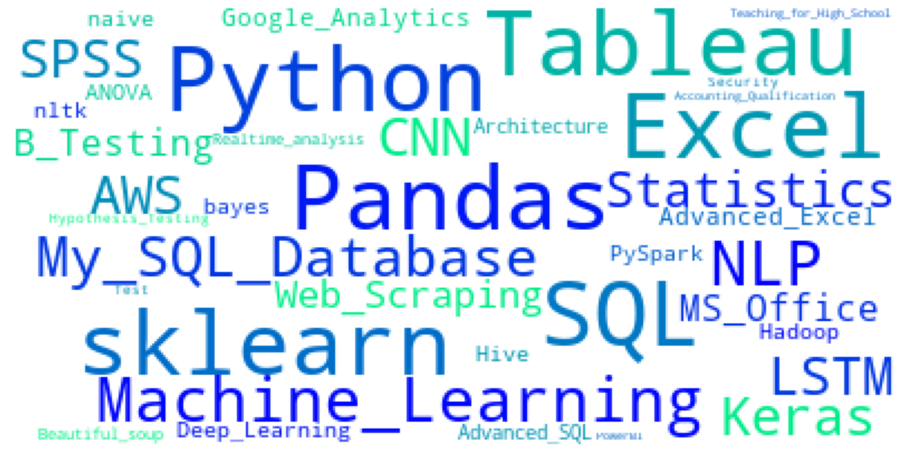

In [72]:
# pos_mask = np.array(Image.open('unnamed.png'))
text = " ".join(i for i in t)
# print ("There are {} adjectives in the scripts.".format(len(ret)))

wordcloud = WordCloud(collocations=False,
                          background_color='white',
                          max_words=50,
                          max_font_size=40, 
                          random_state=1,
                          contour_width=1,
                          colormap="winter",
                          contour_color='black'
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('new.jpg')

In [ ]:
### choose adjectives
tags = set(['VB'])
res=[]
for i in tokens:
    res.append(nltk.pos_tag(i))
flatten = lambda l: [item for sublist in l for item in sublist]
ret = []
for word,pos in flatten(res):
        if (pos in tags):
            ret.append(word)

In [ ]:
len(ret)

In [ ]:
os_mask = np.array(Image.open('unnamed.png'))
text = " ".join(tweet for tweet in ret)
print ("There are {} adjectives in the scripts.".format(len(ret)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=60,
                          max_font_size=60, 
                          random_state=42,
                          mask = pos_mask,
                          contour_width=1,
                          colormap="winter",
                          contour_color='black'
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('verb.jpg')

In [ ]:
### choose adjectives
tags = set(['NN','NNS'])
res=[]
for i in tokens:
    res.append(nltk.pos_tag(i))
flatten = lambda l: [item for sublist in l for item in sublist]
ret = []
for word,pos in flatten(res):
        if (pos in tags):
            ret.append(word)

In [ ]:
len(ret)

In [ ]:
pos_mask = np.array(Image.open('unnamed.png'))
text = " ".join(tweet for tweet in ret)
print ("There are {} adjectives in the scripts.".format(len(ret)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=60,
                          max_font_size=60, 
                          random_state=42,
                          mask = pos_mask,
                          contour_width=1,
                          colormap="winter",
                          contour_color='black'
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('noun.jpg')

### 2. word frequency

In [ ]:
len(words)
sns.set_palette("Set2")

In [ ]:
# remove stopwords
text_new= [word for word in words if word not in stopwords]

In [ ]:
len(text_new)

In [ ]:
from collections import Counter
# Create counter
text_count=Counter(text_new).most_common(50)

In [ ]:
text_df = pd.DataFrame(text_count,columns=['words', 'count'])

In [ ]:
text_df_top50=text_df.sort_values(by='count', ascending=False)[:30]
text_df_top50

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 8))
g=sns.barplot('count','words', data=text_df_top50, orient='h',palette='Set2')
# g.set_xtickslabels()
plt.savefig('total.jpg')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot horizontal bar graph
text_df.sort_values(by='count', ascending=True)[:20].plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")
ax.set_title("Common Words on videos")

plt.show()

In [ ]:
len(words)

In [ ]:
import plotly.express as px
fig = px.treemap(text_df.sort_values(by='count', ascending=False)[:30], path=['words'], values='count',title='Tree of Most Common Words')
fig.show()
plt.savefig('treemap.jpg')

### correlation metrix

In [ ]:
text_df.sort_values(by='count', ascending=False)[:20]

In [ ]:
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
bigram=list(bigrams(words))
len(bigram)

In [ ]:
bigram_counts = Counter(bigram).most_common(15)


In [ ]:
bigram_df = pd.DataFrame(bigram_counts,
                             columns=['bigram', 'count'])
bigram_df

In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [ ]:
d

In [ ]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


In [ ]:
G

In [ ]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df
 
# Build your graph
G=nx.from_pandas_dataframe(df, 'from', 'to')
 
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)

nx.draw(G, with_labels=True, node_size=150, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

pos = nx.spring_layout(G, k=2)
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=5,
                 width=1,
                 edge_color='grey',
                 node_color='pink',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.075, value[1]+.024
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='pink', alpha=0.25),
            horizontalalignment='center', fontsize=16)
plt.show()

In [ ]:
len(words)

In [ ]:
res=[]
for i in words:
    if i in ['what','why', 'how', 'where', 'when']:
        res.append(i)
        
    

In [ ]:
w=pd.DataFrame(res)

In [ ]:
w.columns=['c']

In [ ]:
a=pd.DataFrame(w['c'].value_counts()).reset_index()
a.columns=['w','c']

In [ ]:
a

In [ ]:
import plotly.express as px
fig = px.treemap(a, path=['w'], values='c',title='Tree of Most Common Words', width=600, height=400)
fig.show()
plt.savefig('treemap.jpg')

In [ ]:

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))
fig, ax = plt.subplots(figsize=(10, 4))

pos = nx.spring_layout(G, k=6)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=4,
                 width=1,
                 edge_color='grey',
                 node_color='yellow',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.034
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='pink', alpha=0.35),
            horizontalalignment='center', fontsize=10)
plt.tight_layout()    
plt.show()

In [ ]:
word=words[:100]

In [ ]:
len(df['content'].sum())

In [ ]:
a

In [ ]:
data.content.dropna(inplace=True)
tokens=data['content'].apply(word_tokenize)

In [ ]:
tokens=word_tokenize(df['content'][0])

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}
for i in tokens:
    if i not in stopwords:
        if i not in word_frequencies.keys():
            word_frequencies[i] = 1
        else:
            word_frequencies[i] += 1

In [ ]:
word_frequencies

In [ ]:
a=df['content'][0]

In [ ]:
nltk.sent_tokenize(a)

In [ ]:
word_frequencies

In [ ]:
average

In [ ]:
# #Creating a dictionary to keep the score 
# of each sentence 
sentences = nltk.sent_tokenize(a) 
sentenceValue = dict() 
   
for sentence in sentences: 
    for word, freq in word_frequencies.items(): 
        if word in sentence.lower(): 
            if sentence in sentenceValue: 
                sentenceValue[sentence] += freq 
            else: 
                sentenceValue[sentence] = freq 
sumValues= 0
for sentence in sentenceValue: 
    sumValues += sentenceValue[sentence] 
   
   
average = int(sumValues / len(sentenceValue)) 
   
# Storing sentences into our summary. 
summary = '' 
for sentence in sentences and (): 
    if (sentence in sentenceValue): 
        summary += " " + sentence 
print(summary)

In [ ]:
from punctuator import Punctuator


In [ ]:
p = Punctuator('model.pcl')
print(p.punctuate('some text'))

In [ ]:
a=df['content'][0]

In [ ]:
a


In [ ]:
a="this video is brought to you by morning, brew hi. Welcome to today's episode of cold fusion. Before i start, this episode isn't a recommendation to buy any of apple's products. In fact, i'm a windows and android user myself. The following is simply my documentation of what i perceive to be the biggest moment in computing history in the last decade, or so i think it's just fascinating so make sure you're comfortable for this one, get out the popcorn and be ready to be entertained or learn. A thing or two you are watching tv, [, Music ]. It seems that everyone hates apple these days and there's some rationale for that. Recently, they've made their products impossible to repair increased prices of their products and accessories to a ridiculous level and enjoy excessive control. But what if apple, actually did something to push the industry forward and spur competition? Well, it turns out that they may just have done that. Phones and computers are never seen as comparable when it comes to power. They both live in different worlds, though as long time subscribers would know back in 2012, i was comparing the two of them and seeing if a phone could replace a pc. The rate at which phone power was improving year over year was absolutely unbelievable to me at the time. Those were some fun days. The main difference between phones and desktop computers is that they use different types of processor. Technology phones use a type of processor design called arm, while desktop computers generally use. Another type called x86 like intel, for example, arm, is a simpler design than x86, making it more efficient, but x86 traditionally used to be able to do more, but this is changing. The interesting thing to note is that in recent years, our phones have been getting faster at a much more rapid rate than computers have been improving. So here's a question: what happens when the chips in our phones come close to the power of laptop and desktop computers? What if you took this amazing performance and efficiency of a mobile chip and put it in the body of a laptop that is access to a larger battery and more space to breathe? Well things that many thought were impossible begin to happen, and then i didn't plug it in for four days, totaling a little over 10 hours of mixed use and still had 17 percent. Less animations are buttery smooth as you'd expect, and even opening and closing some of those bigger apps like chrome and lightroom, are just as fast, if not faster than on my desktop, which is sick. It'S just an overall, really responsive, feel. Okay, look at this guy! Okay angelica, when you're editing this show the footage from the surface pro x, uh how that was the windows version of this. There was extreme lag, moving and doing anything, and here it is extremely smooth - and this is the base model macbook air. Without a fan, these m1 macs are setting up the future of mac hardware. As we know it is changing everything the new macbooks and the m1 chip that powers it resulted in an energy efficient chip as powerful as some desktop cpus. What most people are missing is that this isn't an ordinary macbook. The m1 chip represents the culmination of a decade of planning and a radical shift in the consumer computing industry on the surface. Putting a mobile chip in apple's, best-selling computer seems really stupid. But when you look deeper, it makes a whole lot of sense as you'll see later, it's actually a classic case of disruption, as defined by clay christensen in 1997.. So how did apple do this? Well, the journey of how apple got to this point will be the subject of today's episode. You will also see how intel's ceo refused to work on the iphone and made one of the biggest mistakes in tech history to truly understand what apple has done. We first must go through some quick history. Central processing units or cpus are the brain of computers. They do all the billions of calculations, a second to make our devices run cpus run on what are called instructions. These are the fundamental, tiny bits of data that tell our computers what to do. For example, add these two numbers together fetch this number from memory. That kind of thing, when you group these commands together they're called an instruction set in the emerging battle between mobile and desktop cpus. It would be the variations in how these instruction sets were handled. That would make all the difference, since its founding in by robert noyce and gordon moore intel has been the gatekeeper of mainstream computer cpus. They would gain the name x86 after a series of popular chips in the late 70s and early 80s that ended in the number 86. The x86 instruction set architecture would go on to dominate the industry from the 1980s chip. Manufacturers would begin to add more and more complicated instructions to be perceived as better to a non-suspecting buyer. Over time, these instructions made the chip's functionality bloated, precious and limited physical space on the chip was being taken up by fancy instructions that were hardly ever used by the rest of the system. Meanwhile, in the uk, in 1983, a company by the name of acorn computers decided to go down a different path instead of making things more and more complicated, why not take a simpler approach? This mode of thinking was called risk. A reduced instruction set computing as opposed to the bloated sisk from companies like intel. Some people are saying risk technology is the wave of the future. Other people are saying, risk is already a passe technology. What does this expert think well stuart. The current ibm pc line that they're based upon a processor called the 8086.. It'S kind of a messy architecture, so risk gives us as a new starting point. We can say: okay, here's a simpler instruction set faster, less code space. Well, if you talk about risk, is that a philosophy, a way you design a machine architecture or is it a specific set of instructions? It certainly is a philosophy or a style and in fact it's a style which differs depending on what you're trying to do. The main idea is not to add any complexity to the machine unless it pays for itself by how frequently you would use it out of this. Came the acorn risk machine project, otherwise known as arm. This was the birth of the type of chips that would be used in all of our smartphones in the coming decades. So in this episode, for simplicity's sake, we'll just refer to wrist chips as simplified cpus and cisc chips as complex cpus, while developing the first arm chip during testing, something unexpected happened here, professor steve ferber speaks about how he started the arm project as we set about Designing the arm, we didn't really expect to pull it off. Okay. Firstly, we thought this risk idea is so obvious that big industry will pick up on it and will get trampled underfoot. We expected to go into this project finding out why it wasn't a good idea to do it and the and the obstacle just never emerged from the mist we just kept moving forward through the fog. Until eventually we had a fully working arm chip in our hands. I don't think it was day one, but a few days later we decided we'd better measure the power consumption. So i turned the arm. Chip on ran some and some code on it, looked at the ammeter and it was reading zero and i knew we designed a fairly low power chip. But this was um a bit remarkable and it turned out that actually i'd in inserting the ammeter into the power supply, i'd failed to connect the power supply, and so no current was flowing through the ammeter. But the chip was still running so hang on. So it wasn't just you didn't, connect the ammeter. It was actually that you didn't connect the chip to the power supply. Yes, there was no power supply connection to the chip, and yet he was running by 1985. They had their first prototype and by 1987, the first computer based on arm was produced. The acorn, archimedes and from here arm would license its designs to other manufacturers for them to build at first being low power was a nice side effect, but it didn't have much of an advantage for desktop machines, but as portable computing devices started, showing up arm became The first choice: they were used in everything from nokias to ericsson phones. So how are these arm chips so efficient, [, Music ]? When we talk about computer cpus, we measure them in gigahertz, and that means clock cycles per second simplified. Cpus such as arm generally will do one simple instruction per clock cycle, while desktop chips may use many cycles to complete one complex instruction. This means more power, consumption, less efficiency and more heat produced multiply this by hundreds of millions of times a second and the issue starts to become clear in some desktop cpus. Some of the complex instructions can take a dozen clock cycles or more to complete, though, contrary to popular belief, both kinds of processes were flourishing during the 1990s. In the early days, simple instruction set designs were great for engineering and graphics, so much so that computers using the technology helped create films such as jurassic park, toy story and more simple instruction. Cpus were also used in the 3d graphics chip of the nintendo and other early game consoles, but the desktop market safely belonged to intel. This symbol outside says inside you'll find a legacy of technological leadership, the intel pentium processor for the next generation of compatible power. That'S intel the computer inside [, Music ] in 1991 apple, ibm and motorola combined forces to create the power pc chip. Interestingly powerpc was a desktop chip, but used simple instruction. Sets apple would proudly put them in their computers during the 90s. The simple instruction arm cpu would get a huge boost in the form of the ipod in apple's use of the arm chip and the ipod was a microcosm for arm's popularity in portable devices from mobile phones to mp3 players by there were 1 billion arm chips and Devices despite using arms, simple cpus and their portable devices, apple's power, pc collaboration with ibm and motorola, wasn't going so well. Their simple cpus were falling behind intel, it was looking like intel and their complex cpu way of thinking was the way to go for the desktop market, so apple left, powerpc behind and yes, it's true. We are going to begin the transition from the power pc to intel processors when intel signed the deal with apple in 2005. Apple was already thinking of what comes next. They went to intel to see if they could power the upcoming iphone. Now, at this time, a moment occurred that intel would never forget. Paul ottolini, ceo of intel at the time, didn't see such a deal working out as it was far outside their speciality. He didn't believe that intel could earn enough money by building mobile chips for apple's new iphone revenue wasn't going to cover the research costs, or so he thought he couldn't imagine the iphone selling well. This obviously proved to be a huge, missed opportunity. The iphone launched in 2007 using a simple instruction arm cpu if intel's ceo, paul ottolini, had made the deal happen. They would have had a massive stake in the iphone business, but unfortunately, for intel apple was moving on. Without them, in 2008, apple would sign an architecture license with arm. This was so they could design their own chips from the ground up. They would also buy pa semi, a company whose founder previously specialized in high performance arm chip development. This was a key strategic acquisition for apple. It gave them the expertise and potential to design some of the best arm chips and put them on the road to disrupt intel and their x86 processors in 2012 apple releases, their first fully custom designed cpu. It would be code named swift and was used in the iphone 5.. This was in contrast to using off-the-shelf designs from arm, as they had previously done. This new apple built chip was two times as fast as the previous chip, even for being a first generation chip. It had impressive performance when compared to the mobile competition, but it wasn't head-turning. The real shock to the industry came the next year in 2013, with the apple a7 in the iphone 5s apple's early adoption of a 64-bit architecture, stunned everybody, they even beat arm's own cpu teams by more than a year, arm's own 64-bit design, wouldn't be seen until Late 2014, in the form of the galaxy s4 apple, famously called their 2013 chip design, quote desktop class architecture. Most people thought it was just apple bragging, but this wording actually was a hidden clue as to where the company was heading as you'll soon see their latest custom. Chip does actually hold up with desktop pcs. By 2014 there were 50 billion arm chips in the world. All the while apple kept selling a bunch of iphones and making a heap of money, and do you know what all of this revenue you can buy? A ton of r d, the chips inside of the iphone kept evolving and improving getting faster while using less power by the end of 2018, with apple's a12 chip, it was looking like apple was catching up to intel in this chart. The grey dots are apple and the blue squares are intel in the past five years. Intel managed to increase their flagship performance by about 28 percent. In the same time, apple managed to improve their designs by 300, and this is where things start getting very strange. The intel chip at the top of this chart, the core i9 10900k - is a desktop chip that uses 125 watts of power. It'S the kind that you have to plug into a wall. Meanwhile, apple's a14 chip in the iphone, the one in the top right hand corner that performs better than the chip i just mentioned, uses 5 watts and is powered by a phone battery. Youtuber jonathan morrison does a test of exporting a heavy duty. Video file on a desktop versus an iphone 12. check this out. This is a fairly capable machine. It'S a 10 core, it's got a beefy gpu and what i have here is sony fx9, hdr 10-bit footage we're going to start that i'm going to throw this open. We'Re gon na see a couple of things right: we're gon na see the cpu cores just spike up and you should start hearing the fans now in the meantime, while this thing is chugging along, i have the iphone 12 mini little guy keep in mind. This thing is still slowly chugging along i'm, going to open up imovie create a movie. The first thing you notice is just the scrubbing in the playback right, so this is a fanless teeny, tiny, iphone, 12 and just butter. So what i'm going to do is take that export, make sure we're in 4k on 20 battery hdr, keep in mind this thing's still going. It'S got a nice little head start right, so this is on a battery about 20 left no fan, and this is a decked out imac. The thing to note here is that the iphone chip does have hardware acceleration, but it can be argued that this is just a smarter way of doing things anyway. The m1 chip is even faster than this. Looking at this and the speed at which apple's chip performance was accelerating apple, pretty much was forced to ditch intel and their x86 platform intel was just too slow to innovate. They were struggling to keep up with the manufacturing technology, whereas apple could outsource manufacturing of their custom arm designs to others like samsung. The performance lead of intel's desktop cpus were being evaporated right in front of everyone's eyes. By 2019, the ipad was more powerful than the intel macbook pro of the previous year. This is something i mentioned in a previous episode. The speed of all of these advancements would come back to shock people in 2020. If you're interested in this episode so far, you might be keen on some more tech news from today's sponsor morningbrew apple has announced that, from the 1st of january, they'll be lowering their app store fees from 30 to 15. This is in response to the anti-trust allegations from the united states, and eu apple has also agreed to pay 113 million dollars for its scandal in slowing down old iphones to make their batteries last longer. That'S chump change. If you ask me, i came to know these stories through morning brew a great way to catch up on news in the morning. You can get up to speed in just 5 minutes. Instead of wasting time going to different sources, it's informative and makes news less dry and boring. It gets sent to your inbox, each weekday and saturday and it's free, so there's no reason not to subscribe to morning brew if you're interested in business, finance or tech click. The link in the description below to sign up to morning brew it only takes 15 seconds alright. So where were we arm? Chips are being used for low power. Users like in mobile phones, intel refused to make chips for the iphone and then apple decided to do it themselves by acquiring a company and then, with this expertise, apple has pushed the state of the art forward until mobile phone chips were comparable to pcs, and now It was time for arm and apple to take on the pc head on in november of 2020 apple reveals its new processor to take on the pc. It'S called the m1, the company's first custom cpu designed with max in mind. It features 16 billion transistors 35. More than the a14 inside the new iphone 12 and because it's arm-based and shares the same dna as the iphone, the new macbook can run ipad and iphone apps all with transistors. On a five nanometer process. Early testing of the chip is blowing. The online tech reviewer community off their feet, proceeded to annihilate the other tests posting 1744 on single core, which is faster than every intel mac ever made. Now badeem really wants to jump in uh in front of the camera and give his opinion all right. So i have a 2018 base. 15-Inch macbook pro i tried playing league of legends, it's not smooth. It'S glitchy, you get dropped frames and i'm just blown away that we're getting native resolution, everything maxed out getting around 60 fps and you have a dedicated graphics card in that. Yes, it has a dedicated chip and this is under rosetta, not even optimized. It'S not even optimized for apple silicon. These are legit. This is super fast to the point where i had a friend. He actually makes an app a pretty well known app. He uses a hackintosh 3950x 16 core, really decked out system, specifically for development right. This is his build time. Somehow these m1 devices are keeping up, one of them being fanless. It'S pretty crazy, and this was the moment like when i got the numbers back. I was like this is. This is real apple. Silicon is real if apple as a company is to continue on their current performance trajectory. It'S going to be insane to see. Here'S a quote from anandatech quote: apple claims the m1 to be the fastest cpu in the world. Given our data on the older a14 beating all of intel's designs and just falling short of amd's newest zen 3 chips, we can certainly believe that apple and the m1 will be able to achieve that claim. Amd has shown lots of progress lately, however, it'll be incredibly hard to catch up with apple's power efficiency. If apple's performance trajectory continues at this pace, the x86 performance crown might never be regained. End quote: when you are aware of the wider applications of arm in the real world, it was only a matter of time, the fastest supercomputer in the world. The japanese fugaku is three times faster than ibm's and it uses arm architecture, though this is the clincher needing a more powerful computer, isn't relevant to everyone, but having more efficiency and less power. Consumption is, and it's something that everyone cannotice clay christensen who wrote the book. Innovator'S dilemma in 1997 states that disruptive innovations quote involve no new technologies; rather, they consist of components built around proven technologies that are put together in novel architectures, offering the consumer a set of attributes never before available, and he goes on. They are quote initially used only by the unsophisticated consumers of the low end markets, so arm chips have existed since the 1980s, but in the current day, they've traditionally only been used for lower end items like smartphones, for example, though putting arm chips in a laptop has Existed for a long time, windows has done this for years, but having an arm chip that is so powerful that it can reach the top end of the consumer. Computer market is new christiansen who wrote this quote, shows a chart of disruptive technologies 25 years ago. Look carefully at this: what does it look like steve jobs even had something to say about this speaking at the launch of his next computer. He said that all systems and architectures have about 10 years of life. At the start, you have to get people to build applications for it and around year five it reaches its architectural peak quote. Then it goes on what you might call a glide slope. The architecture is everything it's going to ever be at that point. So what about program compatibility well, according to earlier reviews, the cpu is so powerful that it has similar or better performance, running apps that weren't even designed for it. According to the verge, it's so good that they couldn't even tell if the apps running were coded for arm or not. So in conclusion, despite no upgradable ram, a hefty upgrade price and no external gpu support. The big story here is the chip architecture and nothing else. It'S proving that arm can have an inherent advantage in the laptop and desktop space. This moment was decades in the making i feel honored to have been around to witness it. Things are going to get super interesting from here on out, and i can only hope that competition arises from this moment. This is so us, as consumers can win, though it's strange how there are those out there who get upset over this can't we just enjoy the progress that's being made instead of ridiculing each other over our technology preferences. I'M just happy that the technology is moving and competition may come from it. This performance increase is the biggest gap that we've seen in many many years, and i think it's awesome and that's the end of the story. So thanks for watching are you guys excited for future laptops that have extremely long battery life and have the cpu power of desktops. These kinds of machines can be less expensive and do wonders for students and professionals alike. Anyway. That'S it from me. I do want to make a quick mention that i've got some new merch just in time for the holiday season. So if you're feeling festive you can pick some up in the description below anyway, my name is dagogo and you've been watching cold fusion and i'll catch. You again soon for the next episode cheers guys have a good one cold fusion, it's new thinking, um [, Music, ], you"

In [ ]:
df['content'][0]=a

In [ ]:
nltk.sent_tokenize(a)

In [ ]:
# #Creating a dictionary to keep the score 
# of each sentence 
sentences = nltk.sent_tokenize(a) 
sentenceValue = dict() 
   
for sentence in sentences: 
    for word, freq in word_frequencies.items(): 
        if word in sentence.lower(): 
            if sentence in sentenceValue: 
                sentenceValue[sentence] += freq 
            else: 
                sentenceValue[sentence] = freq 
sumValues= 0
for sentence in sentenceValue: 
    sumValues += sentenceValue[sentence] 
   
   
average = int(sumValues / len(sentenceValue)) 
   
# Storing sentences into our summary. 
summary = '' 
for sentence in sentences: 
    if (sentence in sentenceValue): 
        summary += " " + sentence 
print(summary)

In [ ]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [ ]:
maximum_frequncy

In [ ]:
sentence_list = nltk.sent_tokenize(a)

In [ ]:
word_tokenize(a)

In [ ]:
sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [ ]:
sentence_scores

In [ ]:
import heapq
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

### Text auto-generator

In [ ]:
import numpy as np
import sys
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
len(tokens)

In [ ]:
chars = sorted(list(set(tokens)))
char_to_num = dict((c, i) for i, c in enumerate(chars))

In [ ]:
input_len = len(tokens)
vocab_len = len(chars)
print ("Total number of characters:", input_len)
print ("Total vocab:", vocab_len)

In [ ]:
seq_length = 100
x_data = []
y_data = []

In [ ]:
length=50+1
lines=[]
for i in range(length, len(tokens)):
    seq=tokens[(i-length):i]
    line=' '.join(seq)
    lines.append(line)
    if i >20000:
        break

In [ ]:
lines[0]

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(lines)
sequences=tokenizer.texts_to_sequences(lines)
seqs=np.array(sequences)

In [ ]:
#last col to be y, the rest is X
X,y=seqs[:, :-1],seqs[:,-1]

In [ ]:
y[0]

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

In [ ]:
len(set(tokens))

In [ ]:

#convert y to one-hot encoding
y=to_categorical(y, num_classes=vocab_size)

In [ ]:
seq_length=X.shape[1]

In [ ]:
X.shape

### LSTM Model

In [ ]:
vocab_size

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

model=Sequential()
model.add(Embedding(vocab_size,50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X,y, batch_size=256, epochs=100)

In [ ]:
seed_text=lines[0]
seed_text

In [ ]:
X.shape

In [ ]:

#seed_text is the first 50 words
def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
    text=[]
    predicted_word= ''
    for _ in range(n_words):
        encoded=tokenizer.texts_to_sequences([seed_text])[0]
        encoded=pad_sequences([encoded], maxlen=text_seq_length, truncating='pre')
        
        y_predic = numpy.argmax(model.predict(encoded, verbose=0), axis=1)[0]
        #return index

        for word, index in tokenizer.word_index.items():
            if index==y_predic:
                predicted_word=word
                break
        seed_text=seed_text+" "+predicted_word
        text.append(predicted_word)
    return ' '.join(text)
            

In [ ]:
generate_text_seq(model, tokenizer, seq_length, seed_text,100)

In [ ]:
# loop through inputs, start at the beginning and go until we hit
# the final character we can create a sequence out of
for i in range(0, input_len - seq_length, 1):
    # Define input and output sequences
    # Input is the current character plus desired sequence length
    in_seq = tokens[i:i + seq_length]

    # Out sequence is the initial character plus total sequence length
    out_seq = tokens[i + seq_length]

    # We now convert list of characters to integers based on
    # previously and add the values to our lists
    x_data.append([char_to_num[char] for char in in_seq])
    y_data.append(char_to_num[out_seq])

In [ ]:
n_patterns = len(x_data)
print ("Total Patterns:", n_patterns)

In [ ]:
X = numpy.reshape(x_data, (n_patterns, seq_length, 1))
X = X/float(vocab_len)

In [ ]:
X.shape

In [ ]:
y = np_utils.to_categorical(y_data)

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
filepath = "model_weights_saved.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
desired_callbacks = [checkpoint]

In [ ]:
model.fit(X, y, epochs=20, batch_size=256, callbacks=desired_callbacks)

In [ ]:
filename = "model_weights_saved.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
num_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
start = numpy.random.randint(0, len(x_data) - 1)
pattern = x_data[start]
print("Random Seed:")
print("\"", ' '.join([num_to_char[value] for value in pattern]), "\"")

In [ ]:
result

### Ttitle analysis

In [5]:
df['title']
tokens=nltk.word_tokenize(' '.join(df['title']))

In [34]:
# ## in gerenaral analysis
# ## uncontractions
# import re
# def decontracted(phrase):
#     # specific
#     try:
#         phrase = re.sub(r"won't", "will not", phrase)
#         phrase = re.sub(r"can\'t", "can not", phrase)

#         # general
#         phrase = re.sub(r"n\'t", " not", phrase)
#         phrase = re.sub(r"\'re", " are", phrase)
#         phrase = re.sub(r"\'s", " is", phrase)
#         phrase = re.sub(r"\'d", " would", phrase)
#         phrase = re.sub(r"\'ll", " will", phrase)
#         phrase = re.sub(r"\'t", " not", phrase)
#         phrase = re.sub(r"\'ve", " have", phrase)
#         phrase = re.sub(r"\'m", " am", phrase)
        
#     except:
#         pass
#     return phrase

# tokens=decontracted(tokens)

In [18]:
contractions = {
    "\'s":"is",
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",



}
text=' '.join(' '.join(df['title']).split())
for word in text:
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
tokens=text.split(' ')

In [28]:
len(tokens)

5650

In [21]:
text_count=Counter(tokens).most_common(50)

In [20]:
#total words
len(tokens)/700

8.071428571428571

In [22]:
text_df = pd.DataFrame(text_count,columns=['words', 'count'])

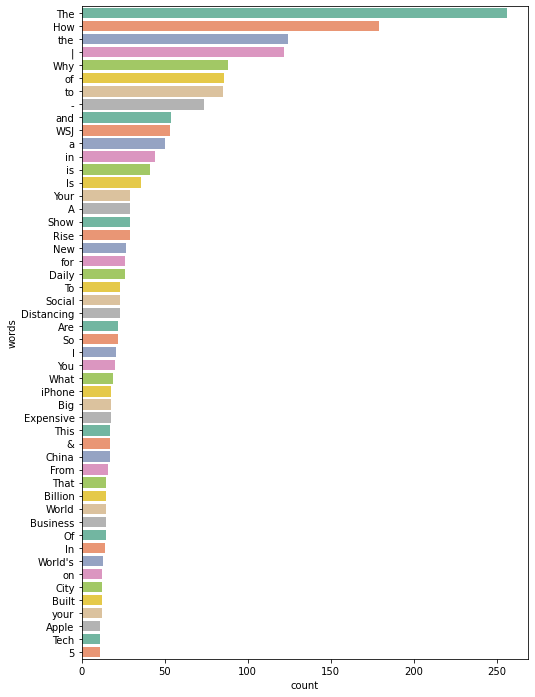

In [30]:
import seaborn as sns
plt.figure(figsize=(8, 12))
g=sns.barplot('count','words', data=text_df, orient='h',palette='Set2')
plt.savefig('title.png')

### Including 'taxes', 'small business'

In [31]:
fil=[]
for i in range(len(df['content'])):
    if ('tax' in df['content'][i].split(' ')) or ('busniess' in df['content'][i].split(' ')) or ('taxes' in df['content'][i].split(' ')):
        fil.append(i)
        

In [32]:
len(fil)# 65 videos have taxes, tax and business

65

In [37]:
df.iloc[fil]['content']

18     [Music] [Music] this episode is a more detaile...
53     the rise of the machines as automation spreads...
59     thanks to skillshare for sponsoring this video...
71     this video is sponsored by audible listen to a...
72     this video is sponsored by curiosity stream us...
                             ...                        
613    hi I'm Joel Weber the editor of Bloomberg Busi...
633    [Music] joe biden the man may be new to the ra...
639    [Music] scandals every president's had one but...
640    [Music] [Applause] [Music] [Applause] [Music] ...
667    [Music] so up mkbhd here and this is the samsu...
Name: content, Length: 65, dtype: object